# Utilização do Algoritmo Depth First Search Path para busca de caminhos por custo

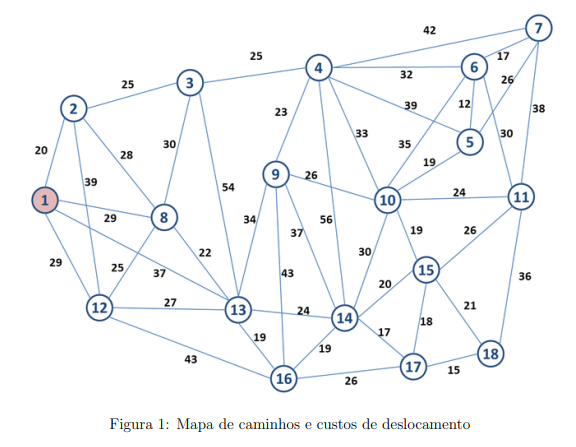

In [2]:
graph = {
    1:{2:20, 8:29, 13:37, 12:29,},
    2:{3:25, 8:28, 12:39, 1:20,},
    3:{4:25, 13:54, 8:30, 2:25,},
    4:{7:42, 6:32, 5:39, 10:33, 14:56, 9:23, 3:25,},
    5:{4:39, 6:12, 7:26, 10:19,},
    6:{4:32, 7:17, 11:30, 5:12, 10:35,},
    7:{4:42, 6:17, 5:26, 11:38,},
    8:{1:29, 2:28, 3:30, 13:22, 12:25,},
    9:{4:23, 10:26, 14:37, 16:43, 13:34,},
    10:{4:33, 6:35, 5:19, 11:24, 15:19, 14:30, 9:26,},
    11:{6:30, 7:38, 10:24, 15:26, 18:36,},
    12:{1:29, 2:39, 8:25, 13:27, 16:43,},
    13:{12:27, 1:37, 8:22, 3:54, 9:34, 14:24, 16:19,},
    14:{13:24, 9:37, 4:56, 10:30, 15:20, 17:17, 16:19,},
    15:{10:19, 11:26, 18:21, 17:18, 14:20,},
    16:{12:43, 13:19, 9:43, 14:19, 17:26,},
    17:{16:26, 14:17, 15:18, 18:15,},
    18:{17:15, 15:21, 11:36,},
}

In [3]:
def removeDictItem(_dict, listToRemove):
    for i in listToRemove:
        try:
            _dict.pop(i)
        except:
            pass
    return _dict

def calculatePathCost(graph, lstPaths):    
    dictPathCosts = {}

    for path in lstPaths:
        totalCost = 0
    
        for i in range(0, len(path)):
            if path[i] != path[-1]:
                totalCost = totalCost + graph[path[i]][path[i+1]]
        
        dictPathCosts[totalCost] = path
    
    return dictPathCosts

def sortPathByCosts(dictPathsWithCosts):
    sortedDict = {}
    for cost in sorted(dictPathsWithCosts):
        sortedDict[cost] = dictPathsWithCosts[cost]
    return sortedDict

def dfs_paths(graph, start, goal, n_paths=5):
    
    stack = [(start, [start])]
    
    paths = []
    
    while stack:
        (vertex, path) = stack.pop()
        for next in removeDictItem(graph[vertex], path):
            if next == goal:
                paths.append(path + [next])
            else:
                stack.append((next, path + [next]))
    
    pathsWithCosts = calculatePathCost(graph, paths)
    pathsWithCostsSorted = sortPathByCosts(pathsWithCosts)
    
    return {p:pathsWithCostsSorted[p] for i,p in enumerate(pathsWithCostsSorted) if i < n_paths}

In [4]:
dfs_paths(graph=graph, start=1, goal=8, n_paths=5)

{29: [1, 8], 48: [1, 2, 8], 54: [1, 12, 8], 59: [1, 13, 8], 78: [1, 12, 13, 8]}